# Importing the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the Data 

In [2]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')
products = pd.read_csv('Products.csv')

# Data Understanding

In [3]:
print(customers.shape, products.shape, transactions.shape)

(200, 4) (100, 4) (1000, 7)


In [4]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [5]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [6]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [7]:
print(customers.info())
print()
print(products.info())
print()
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           ------------

In [8]:
# converting the data type of signupdate and transactiondate from object to datetime

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [9]:
# Extracting year and month from the dates
customers['signup_year'] = customers['SignupDate'].dt.year
customers['signup_month'] = customers['SignupDate'].dt.month
transactions['trans_year'] = transactions['TransactionDate'].dt.year
transactions['trans_month'] = transactions['TransactionDate'].dt.month

# Data Exploration

In [10]:
for i in [customers, products, transactions]:
    print('No.of.duplicates present: ', i.duplicated().sum())

No.of.duplicates present:  0
No.of.duplicates present:  0
No.of.duplicates present:  0


In [11]:
for i in [customers, products, transactions]:
    print('No.of.missing values present: ', i.isna().sum())
    print()

No.of.missing values present:  CustomerID      0
CustomerName    0
Region          0
SignupDate      0
signup_year     0
signup_month    0
dtype: int64

No.of.missing values present:  ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

No.of.missing values present:  TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
trans_year         0
trans_month        0
dtype: int64



# Exploratory Data Analysis

## Analysis of Customers

In [12]:
customers.columns

Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate', 'signup_year',
       'signup_month'],
      dtype='object')

In [13]:
def customer_summary(customers):
    total_no_of_customers = customers['CustomerID'].count()
    ym = customers['SignupDate'].dt.to_period('M')
    
    print('Total_Number_of _Customers = ', total_no_of_customers )
    

    plt.figure(figsize=(15, 8))
    plt.subplot(2,2,1)
    plt.title('Distribution of Customers by Region')
    customers.groupby('Region')['CustomerID'].count().plot(kind='pie', autopct='%.2f%%')
    
    
    plt.subplot(2,2,2)
    plt.title('Customer Signup - Yearwise')
    customers.groupby('signup_year')['CustomerID'].count().plot(kind='line', marker='o')
    
    plt.subplot(2,2,3)
    plt.title('Customer Signup - Monthwise')
    customers.groupby('signup_month')['CustomerID'].count().plot(kind='line', marker='o')
    plt.grid(axis='x')
    
    plt.subplot(2,2,4)
    plt.title('Customer Signup Over Time (Year-Month)')
    customers.groupby(ym)['CustomerID'].count().plot(kind='line', marker='o')
    plt.grid(axis='x', which='minor')
    plt.tight_layout()
    plt.show()
    

Total_Number_of _Customers =  200


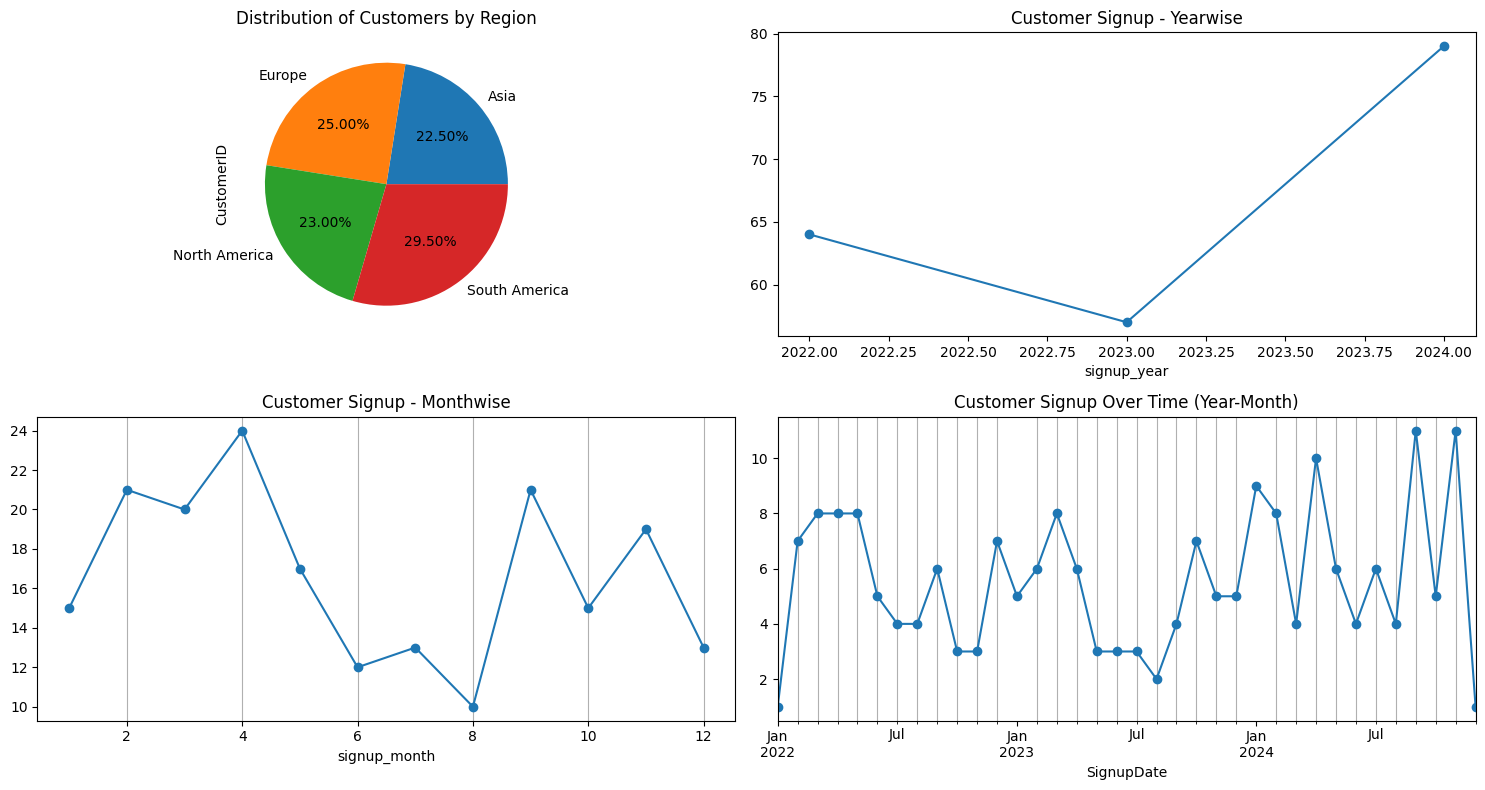

In [14]:
customer_summary(customers)

In [15]:
print('Count of customers signups in 2023: ', customers[customers.signup_year==2023].CustomerID.nunique())

diff1 = customers[customers.signup_year==2022].CustomerID.nunique() - customers[customers.signup_year==2023].CustomerID.nunique()
diff2 = customers[customers.signup_year==2024].CustomerID.nunique() - customers[customers.signup_year==2022].CustomerID.nunique()

print('Percentage decrease of customer signups in 2023 from 2022: ', 
      (diff1/customers[customers.signup_year==2022].CustomerID.nunique())*100)
print('Percentage Increase of customer signups in 2024 from 2022: ', 
      (diff2/customers[customers.signup_year==2022].CustomerID.nunique())*100)

Count of customers signups in 2023:  57
Percentage decrease of customer signups in 2023 from 2022:  10.9375
Percentage Increase of customer signups in 2024 from 2022:  23.4375


### Inferences:
* The total number of customers are 200 and are from 4 regions: South America, Europe, North America, and Asia.
* The customer percent from the 4 region is almost around 25% and South America(29.5%) tops the list.
* Customer signups dropped almost 11% in 2023 when compared with 2022 whereas a 23% increase in signups was observed in 2024.
* Overall, April has the maximum signups followed by September and February.

## Analysis of Products

In [16]:
products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [17]:
def products_summary(products):
    print('Total Number of Products = ', products['ProductID'].nunique())
    print(products.describe())
    
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.title('Products count by Category')
    products.groupby('Category')['ProductID'].count().plot(kind='pie', autopct = '%.2f%%')
    
    plt.subplot(1,2,2)
    plt.title('Average Price by Category')
    avg = products.groupby('Category')['Price'].mean().sort_values(ascending=False)
    sns.barplot(x=avg.index, y=avg.values, color='cyan')
    
    for i,v in enumerate(avg):
        plt.text(i, v, f'{round(v,2)}', ha='center')
    
    plt.tight_layout()
    plt.show()
    
    print('Top 10 Expensive Products: \n', products.nlargest(10, 'Price'))
    print()
    print('Top 10 Economical Products: \n', products.nsmallest(10, 'Price'))

Total Number of Products =  100
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


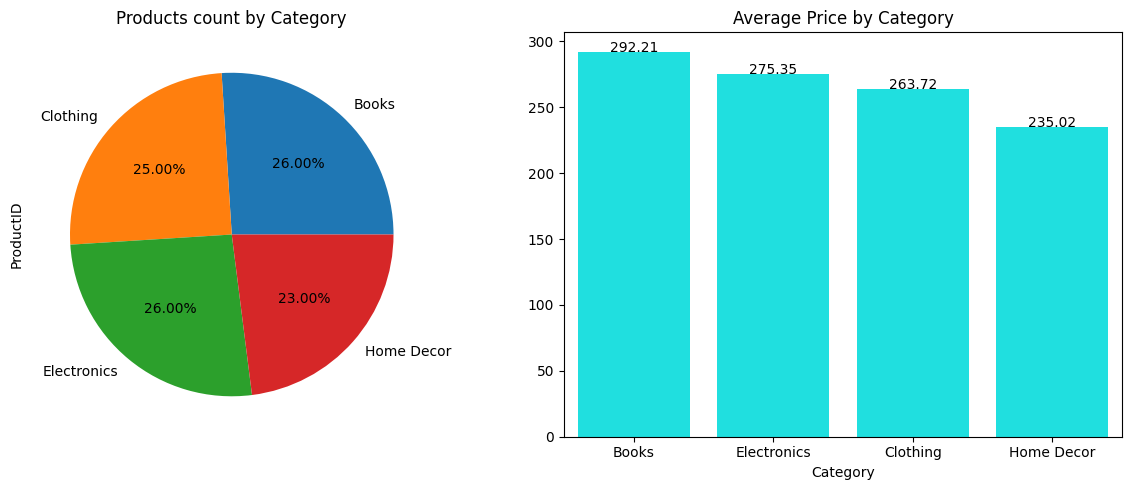

Top 10 Expensive Products: 
    ProductID               ProductName     Category   Price
74      P075          TechPro Textbook        Books  497.76
31      P032        BookWorld Cookbook        Books  488.63
44      P045         SoundWave T-Shirt     Clothing  481.78
16      P017       ActiveWear Textbook        Books  469.77
36      P037      SoundWave Smartwatch  Electronics  459.86
40      P041  ComfortLiving Smartphone  Electronics  456.28
82      P083     ActiveWear Smartwatch  Electronics  455.72
22      P023   ActiveWear Cookware Set   Home Decor  454.53
63      P064   HomeSense Running Shoes     Clothing  452.42
93      P094    HomeSense Cookware Set   Home Decor  447.34

Top 10 Economical Products: 
    ProductID               ProductName     Category  Price
55      P056      SoundWave Smartwatch  Electronics  16.08
43      P044  ActiveWear Running Shoes     Clothing  18.82
13      P014         ActiveWear Jacket     Clothing  26.26
72      P073      ComfortLiving Laptop  Elec

In [18]:
products_summary(products)

### Inferences
* The total number of unique products are 100 and are available in 4 categories: Books, Electronics, Clothing and Homedecor.
* The price of products range from 16 units of currency to around 498 units of currency.
* Books and Electronics tops the products category with 26%, followed by clothing 25% and Homedecor 23%.
* The average price of books is the highest (292 units of currency).

## Analysis of Transactions

In [19]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,trans_year,trans_month
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,2024,8
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,2024,5
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,2024,4
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,2024,3
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,2024,3


In [20]:
transactions.describe()

,TransactionDate,Quantity,TotalValue,Price,trans_year,trans_month
count,1000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407,2023.996000,6.288000
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000,2023.000000,1.000000
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000,2024.000000,3.000000
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000,2024.000000,6.000000
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000,2024.000000,9.000000
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000,2024.000000,12.000000
std,NaN,1.117981,493.144478,140.73639,0.063151,3.437859


In [21]:
def transaction_metrics(transactions):
    print('Total Number of transactions: ', transactions['TransactionID'].nunique())
    print('Total Number of Quantities sold: ', transactions['Quantity'].sum())
    print('Total Revenue: ', transactions['TotalValue'].sum())

In [22]:
transaction_metrics(transactions)

Total Number of transactions:  1000
Total Number of Quantities sold:  2537
Total Revenue:  689995.56


In [23]:
def transactions_summary(transactions):
    
    trans_month = transactions.groupby('trans_month')['TransactionID'].count()
    ym = transactions['TransactionDate'].dt.to_period('M')
    
    plt.figure(figsize=(10,5))
    plt.subplot(2,2,1)
    plt.title('Number of Transactions by Year')
    transactions.groupby('trans_year')['TransactionID'].count().plot(marker='o')
    
    plt.subplot(2,2,2)
    plt.title('Number of Transactions by Month')
    plt.plot(trans_month.index, trans_month.values , marker='o')
    
    for x, y in zip(trans_month.index, trans_month.values):
        plt.text(x, y, f'{y}', ha='center', va='bottom')
        
    plt.subplot(2,2,3)
    plt.title('Number of Transactions: Year-Month wise')
    transactions.groupby(ym)['TransactionID'].count().plot(kind='line', marker='o')
    
    
    plt.tight_layout()
    plt.show()

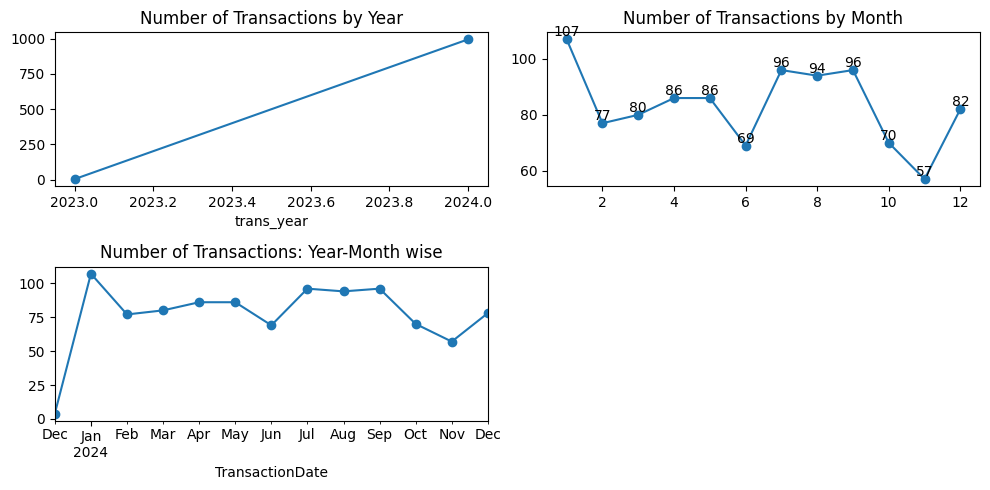

In [24]:
transactions_summary(transactions)

In [25]:
#print(customers.head(3))
#print()
#print(transactions.head(3))

cust_details = transactions.merge(customers, how='right', on='CustomerID')
print(cust_details.head())

  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00015      C0001      P054 2024-01-19 03:12:55       2.0   
1        T00932      C0001      P022 2024-09-17 09:01:18       3.0   
2        T00085      C0001      P096 2024-04-08 00:01:00       2.0   
3        T00445      C0001      P083 2024-05-07 03:11:44       2.0   
4        T00436      C0001      P029 2024-11-02 17:04:16       3.0   

   TotalValue   Price  trans_year  trans_month      CustomerName  \
0      114.60   57.30      2024.0          1.0  Lawrence Carroll   
1      412.62  137.54      2024.0          9.0  Lawrence Carroll   
2      614.94  307.47      2024.0          4.0  Lawrence Carroll   
3      911.44  455.72      2024.0          5.0  Lawrence Carroll   
4     1300.92  433.64      2024.0         11.0  Lawrence Carroll   

          Region SignupDate  signup_year  signup_month  
0  South America 2022-07-10         2022             7  
1  South America 2022-07-10         2022             7  

In [26]:
## Customers with most transactions

print('Details of top 10 Customers with Most Transactions: ')
res = cust_details.groupby('CustomerName')[['TransactionID']].count().sort_values(by='TransactionID', ascending=False).head(10)

res.merge(customers, how='inner', on='CustomerName')

Details of top 10 Customers with Most Transactions: 


,CustomerName,TransactionID,CustomerID,Region,SignupDate,signup_year,signup_month
0,Abigail Jones,11,C0109,North America,2022-05-09,2022,5
1,William Adams,11,C0156,North America,2023-08-19,2023,8
2,David Li,10,C0008,North America,2024-01-13,2024,1
3,Gerald Hines,10,C0065,North America,2024-07-10,2024,7
4,Paul Parsons,10,C0141,Europe,2023-02-23,2023,2
5,Matthew Johnson,10,C0175,Asia,2022-04-16,2022,4
6,Juan Mcdaniel,9,C0165,South America,2022-04-09,2022,4
7,Misty Higgins,9,C0075,Europe,2023-05-01,2023,5
8,Belinda Garner,9,C0084,Asia,2024-09-17,2024,9
9,Nancy Walker,9,C0093,Asia,2024-07-13,2024,7


In [27]:
# Customers with no transactions

cust_details[cust_details.TransactionID.isna()]

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,trans_year,trans_month,CustomerName,Region,SignupDate,signup_year,signup_month
904,NaN,C0180,NaN,NaT,NaN,NaN,NaN,NaN,NaN,Amy Carpenter,Asia,2023-10-25,2023,10


In [28]:
print('Top 10 High Value Customers: ')
det = cust_details.groupby('CustomerName')[['TotalValue']].sum().sort_values(by='TotalValue', ascending=False).head(10)

det.merge(customers, on='CustomerName', how='inner')

Top 10 High Value Customers: 


,CustomerName,TotalValue,CustomerID,Region,SignupDate,signup_year,signup_month
0,Paul Parsons,10673.87,C0141,Europe,2023-02-23,2023,2
1,Bruce Rhodes,8040.39,C0054,Asia,2024-09-29,2024,9
2,Gerald Hines,7663.70,C0065,North America,2024-07-10,2024,7
3,William Adams,7634.45,C0156,North America,2023-08-19,2023,8
4,Aimee Taylor,7572.91,C0082,South America,2022-05-13,2022,5
5,Anna Ball,7111.32,C0188,South America,2022-05-17,2022,5
6,Mrs. Kimberly Wright,7073.28,C0059,North America,2024-04-07,2024,4
7,Jennifer Pena,6819.57,C0028,Asia,2024-06-29,2024,6
8,Rodney Eaton,6715.72,C0099,South America,2023-01-29,2023,1
9,Juan Mcdaniel,6708.10,C0165,South America,2022-04-09,2022,4


In [29]:
print('Customers with Maximum Transactions and High Value: ')
res.merge(det, on='CustomerName', how='inner').merge(customers, on='CustomerName', how='inner')

Customers with Maximum Transactions and High Value: 


,CustomerName,TransactionID,TotalValue,CustomerID,Region,SignupDate,signup_year,signup_month
0,William Adams,11,7634.45,C0156,North America,2023-08-19,2023,8
1,Gerald Hines,10,7663.70,C0065,North America,2024-07-10,2024,7
2,Paul Parsons,10,10673.87,C0141,Europe,2023-02-23,2023,2
3,Juan Mcdaniel,9,6708.10,C0165,South America,2022-04-09,2022,4


In [30]:
print('Region wise Transaction Count: ')
cust_details.groupby('Region')[['TransactionID']].count().sort_values(by='TransactionID', ascending=False)

Region wise Transaction Count: 


,TransactionID
Region,
South America,304
North America,244
Europe,234
Asia,218


In [31]:
print('Transcation Value by Region : ')
cust_details.groupby('Region')[['TotalValue']].sum().sort_values(by='TotalValue', ascending=False)

Transcation Value by Region : 


,TotalValue
Region,
South America,219352.56
Europe,166254.63
North America,152313.40
Asia,152074.97


In [32]:
prdt_details = products.merge(transactions, on='ProductID', how='left')
print(prdt_details.head(3))

  ProductID           ProductName Category  Price_x TransactionID CustomerID  \
0      P001  ActiveWear Biography    Books    169.3        T00088      C0019   
1      P001  ActiveWear Biography    Books    169.3        T00314      C0024   
2      P001  ActiveWear Biography    Books    169.3        T00428      C0071   

      TransactionDate  Quantity  TotalValue  Price_y  trans_year  trans_month  
0 2024-01-30 17:23:03         2       338.6    169.3        2024            1  
1 2024-09-24 17:15:16         4       677.2    169.3        2024            9  
2 2024-08-02 08:13:23         2       338.6    169.3        2024            8  


In [33]:
print('Product Category and Number of Transactions: ')
prdt_details.groupby('Category')[['TransactionID']].count().sort_values(by='TransactionID', ascending=False)

Product Category and Number of Transactions: 


,TransactionID
Category,
Books,270
Electronics,254
Home Decor,248
Clothing,228


In [34]:
print('Product Category and TotalValue: ')
prdt_details.groupby('Category')[['TotalValue']].sum().sort_values(by='TotalValue', ascending=False)

Product Category and TotalValue: 


,TotalValue
Category,
Books,192147.47
Electronics,180783.50
Clothing,166170.66
Home Decor,150893.93


### Inferences
* A total of 1000 transactions were recorded from 2023 to 2024.
* Total quantities sold = 2537
* Total revenue = 689995.56 units of currency
* Maximum transactions were observed in January and July to September.
* CustomerID: C0180, Amy Carpenter from Asia has made no trasactions since signup on Oct 2023.
* William Adams (C0156), Gerald Hines(C0065) from North America and Paul Parsons (C0141) from Europe and Juan Mcdaniel(C0165) from South America are the customers with most transactions and also transactions of high totalvalue.	
* South America tops in most transactions and high totalvalue transactions.
* Asia is the lowest in the number of transactions and totalvalue.
* Most number of transactions are for Books and least number of transactions are for Clothes.
* Similary, transactions on Books tops totalvalue.